In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ames = pd.read_csv("AmesHousing.txt", delimiter="\t")
print(ames.head(n=6))
print(ames.columns.values)
print(ames.describe())
print(ames.info())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   
5      6  527105030           60        RL          78.0      9978   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   
5   NaN       IR1          Lvl    ...   

In [11]:
"""
returns a train dataset comprising the first 1460 rows of df.
"""

def transform_features(df):
    train = df.iloc[:1460]
    return train

a = transform_features(ames)
print(a.head(6))
print(a.columns.values)
print(a.describe())
print(a.info())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   
5      6  527105030           60        RL          78.0      9978   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   
5   NaN       IR1          Lvl    ...   

In [12]:
"""
returns the 'Gr Liv Area' and 'SalePrice' columns from db.
"""

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]


In [13]:
"""
trains and tests a model predicting SalePrice on Gr Liv Area
"""

def train_and_test(df):
    np.random.seed(1)
    #train_df = transform_features(df)
    #train_df_length = len(train_df)
    #train_df = df.iloc[:train_df_length]
    #test_df = df.iloc[train_df_length:]
    
    target_column = "SalePrice"
    train_column = "Gr Liv Area"    
    kf = KFold(5, shuffle=True, random_state=1)
    lr = LinearRegression()
    
    mses = cross_val_score(lr, df[[target_column]], df[train_column], scoring="neg_mean_squared_error", cv=kf)
    rmses = [np.sqrt(np.absolute(mse)) for mse in mses]
    avg_rmse = np.mean(rmses)
    return avg_rmse
    
a= train_and_test(ames)
print(a)


356.67386215


In [14]:
ames["Years_Until_Remod"] = ames["Year Built"] - ames["Year Remod/Add"]

"""
returns a filtered df:
- filters out numerical cols with more than 25% NA rows and replaces
NAs with np.mean if NA rows less than 25%
- normalizes numerical cols
- filters out categorical columns that have more than ~200 unique rows
- filters out categorical columns that have 1 val corresponding to more than 95% of the rows.
"""

def select_features_v2(df):  
    columns = df.columns.values.tolist()
    unnecessary_cols = ["PID", "Misc Val", "Alley", "Misc Feature", "Year Built", "Garage Yr Blt", "Year Remod/Add", "Fence", "Fireplace Qu","Mo Sold", "Pool QC","Yr Sold", "Sale Type", "Sale Condition"]
    numerical_cols = []
    object_cols = []
    for col in columns:
        if df[col].dtype == "float64" or df[col].dtype == "int64":
            if df[col].isnull().sum() >= len(df[col]) * 0.25:
                unnecessary_cols.append(col)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
                df[col] = (df[col] - np.mean(df[col]))/np.std(df[col])
                numerical_cols.append(col)       
        else: 
            column_freqs = df[col].value_counts().values.tolist()       
            for i, v in enumerate(column_freqs):
                if v > 0.95 * len(df[col]):
                    unnecessary_cols.append(col)
            if len(column_freqs) > 0.05 * len(df[col]):
                unnecessary_cols.append(col)
            else:
                object_cols.append(col)
    filtered_cols = numerical_cols + object_cols
    filtered_cols = [i for i in filtered_cols if i not in unnecessary_cols]
    return df[filtered_cols]

ames = select_features_v2(ames)
print(ames.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 63 columns):
Order                2930 non-null float64
MS SubClass          2930 non-null float64
Lot Frontage         2930 non-null float64
Lot Area             2930 non-null float64
Overall Qual         2930 non-null float64
Overall Cond         2930 non-null float64
Mas Vnr Area         2930 non-null float64
BsmtFin SF 1         2930 non-null float64
BsmtFin SF 2         2930 non-null float64
Bsmt Unf SF          2930 non-null float64
Total Bsmt SF        2930 non-null float64
1st Flr SF           2930 non-null float64
2nd Flr SF           2930 non-null float64
Low Qual Fin SF      2930 non-null float64
Gr Liv Area          2930 non-null float64
Bsmt Full Bath       2930 non-null float64
Bsmt Half Bath       2930 non-null float64
Full Bath            2930 non-null float64
Half Bath            2930 non-null float64
Bedroom AbvGr        2930 non-null float64
Kitchen AbvGr        2930 non-nul

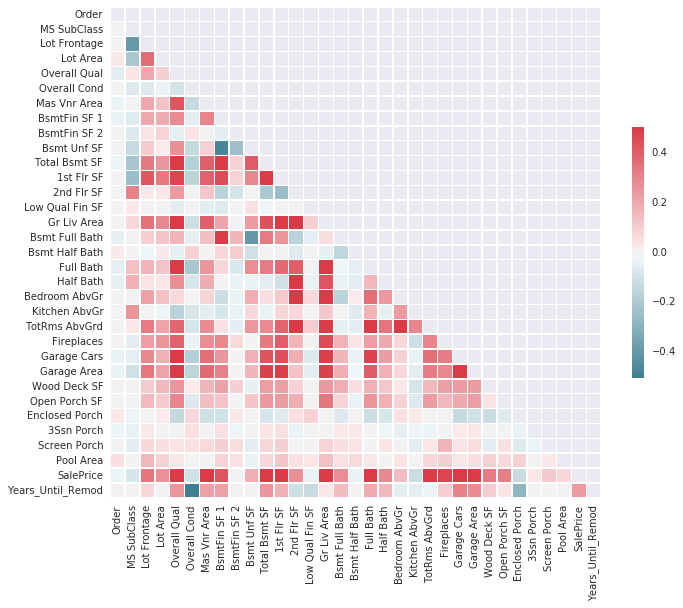

In [15]:
numerical_cols = []
object_cols = []

columns = ames.columns.values.tolist()
for col in columns:
    if ames[col].dtype == "float64" or ames[col].dtype == "int64":
        numerical_cols.append(col)
    else:
        object_cols.append(col)

        
# Heatmap    
corr = ames[numerical_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

      


In [16]:
corr_sale_price = ames[numerical_cols].corr()["SalePrice"]        

corr_dict = {}
corr_list_vals = corr_sale_price.values.tolist()
corr_list_index = corr_sale_price.index.tolist()

for i, v in enumerate(corr_list_vals):
    corr_dict[corr_list_index[i]] = abs(v)

for i in sorted(corr_dict, key=corr_dict.get, reverse=True):
    print(i,":",corr_dict[i])

SalePrice : 1.0
Overall Qual : 0.7992617947690384
Gr Liv Area : 0.7067799209766283
Garage Cars : 0.6478611103005979
Garage Area : 0.6403854605743773
Total Bsmt SF : 0.6321051167356049
1st Flr SF : 0.6216760632702545
Full Bath : 0.5456039005200994
Mas Vnr Area : 0.5057840813924463
TotRms AbvGrd : 0.495474416857031
Fireplaces : 0.47455809259177445
BsmtFin SF 1 : 0.43279435727904386
Lot Frontage : 0.34075105363309977
Wood Deck SF : 0.3271431739831667
Open Porch SF : 0.3129505056627107
Half Bath : 0.2850560315387054
Bsmt Full Bath : 0.2758936743829049
2nd Flr SF : 0.26937335658958966
Lot Area : 0.26654922032843015
Years_Until_Remod : 0.24016751978091408
Bsmt Unf SF : 0.18280455163756873
Bedroom AbvGr : 0.14391342840037802
Enclosed Porch : 0.12878744150780239
Kitchen AbvGr : 0.11981372022706586
Screen Porch : 0.11215121356052957
Overall Cond : 0.10169693218100766
MS SubClass : 0.0850915756099594
Pool Area : 0.06840324689815831
Low Qual Fin SF : 0.03765976523775115
Bsmt Half Bath : 0.0358151

In [17]:
"""
Among the most significant columns correlating with SalePrice are columns
measuring areas: in particular, Gr Liv Area, Total Bsmt SF, 1st Flr SF, etc.
Checking how Gr Liv Area correlates with other columns to avoid multicollinearity.
It seems OK with the columns mentioned.
"""

corr_sale_price = ames[numerical_cols].corr()["Gr Liv Area"]        

corr_dict = {}
corr_list_vals = corr_sale_price.values.tolist()
corr_list_index = corr_sale_price.index.tolist()

for i, v in enumerate(corr_list_vals):
    corr_dict[corr_list_index[i]] = abs(v)

for i in sorted(corr_dict, key=corr_dict.get, reverse=True):
    print(i,":",corr_dict[i])

Gr Liv Area : 1.0
TotRms AbvGrd : 0.8077721448904646
SalePrice : 0.7067799209766283
2nd Flr SF : 0.6552511798220025
Full Bath : 0.6303208098773981
Overall Qual : 0.5705558566643828
1st Flr SF : 0.5621658429320108
Bedroom AbvGr : 0.5168075108650348
Garage Cars : 0.48879356892684483
Garage Area : 0.484857341105713
Fireplaces : 0.4549241958753043
Total Bsmt SF : 0.44456693350014387
Half Bath : 0.43394862895154057
Mas Vnr Area : 0.40264785709867795
Lot Frontage : 0.3507276206330722
Open Porch SF : 0.3408565699345814
Lot Area : 0.2855992141342608
Wood Deck SF : 0.2501534424111656
Bsmt Unf SF : 0.23541606618373936
BsmtFin SF 1 : 0.2095818321721626
Pool Area : 0.13546347087522811
Kitchen AbvGr : 0.1178356710781903
Overall Cond : 0.11564253505458952
Low Qual Fin SF : 0.0970496747405219
Screen Porch : 0.08680441829889697
MS SubClass : 0.0680608557111871
Bsmt Full Bath : 0.05833331188757107
Bsmt Half Bath : 0.04321029498591304
Years_Until_Remod : 0.02918558428706864
BsmtFin SF 2 : 0.018116012203

In [18]:
"""
After adding dummy variables for all actegorical variables, it is time to see how well 
they explain the variation in SalePrice.
Applying recursive feature elimination (RFE) to identify 
2 categoriical variables that are most suitable.
"""


dummy_df = pd.get_dummies(ames[object_cols])
target = ames["SalePrice"]
dummy_df = pd.concat([dummy_df, target], axis=1)

X = dummy_df.values[:,:30]
Y = dummy_df.values[:,30]

model = LogisticRegression()
rfe = RFE(model, 2)
fit = rfe.fit(X, Y)
print("Num Features Selected:", fit.n_features_)

selected_features_dict = {}
for i, v in enumerate(fit.support_.tolist()):
    selected_features_dict[object_cols[i]] = v

for i in sorted(selected_features_dict, key=selected_features_dict.get, reverse=True):
    print(i,":",selected_features_dict[i])


Num Features Selected: 2
Exterior 2nd : True
Condition 1 : True
Bsmt Cond : False
Kitchen Qual : False
Functional : False
BsmtFin Type 2 : False
Garage Cond : False
Foundation : False
Exterior 1st : False
MS Zoning : False
Neighborhood : False
Exter Qual : False
Garage Finish : False
Land Contour : False
BsmtFin Type 1 : False
Garage Type : False
Roof Style : False
Heating QC : False
Garage Qual : False
Paved Drive : False
Lot Config : False
Central Air : False
Electrical : False
Bsmt Qual : False
Bldg Type : False
Exter Cond : False
Lot Shape : False
House Style : False
Bsmt Exposure : False
Mas Vnr Type : False


In [19]:
"""
Adding numerical columns except SalePrice with dummy_df 
which already has SalePrice as the last column.
"""

ames_num = ames[numerical_cols]
ames_num.drop("SalePrice", axis=1, inplace=True)
ames = pd.concat([ames_num, dummy_df], axis=1)
print(ames.columns.values)

['Order' 'MS SubClass' 'Lot Frontage' 'Lot Area' 'Overall Qual'
 'Overall Cond' 'Mas Vnr Area' 'BsmtFin SF 1' 'BsmtFin SF 2' 'Bsmt Unf SF'
 'Total Bsmt SF' '1st Flr SF' '2nd Flr SF' 'Low Qual Fin SF' 'Gr Liv Area'
 'Bsmt Full Bath' 'Bsmt Half Bath' 'Full Bath' 'Half Bath' 'Bedroom AbvGr'
 'Kitchen AbvGr' 'TotRms AbvGrd' 'Fireplaces' 'Garage Cars' 'Garage Area'
 'Wood Deck SF' 'Open Porch SF' 'Enclosed Porch' '3Ssn Porch'
 'Screen Porch' 'Pool Area' 'Years_Until_Remod' 'MS Zoning_A (agr)'
 'MS Zoning_C (all)' 'MS Zoning_FV' 'MS Zoning_I (all)' 'MS Zoning_RH'
 'MS Zoning_RL' 'MS Zoning_RM' 'Lot Shape_IR1' 'Lot Shape_IR2'
 'Lot Shape_IR3' 'Lot Shape_Reg' 'Land Contour_Bnk' 'Land Contour_HLS'
 'Land Contour_Low' 'Land Contour_Lvl' 'Lot Config_Corner'
 'Lot Config_CulDSac' 'Lot Config_FR2' 'Lot Config_FR3' 'Lot Config_Inside'
 'Neighborhood_Blmngtn' 'Neighborhood_Blueste' 'Neighborhood_BrDale'
 'Neighborhood_BrkSide' 'Neighborhood_ClearCr' 'Neighborhood_CollgCr'
 'Neighborhood_Crawfor' 'Nei

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
"""
selecting explanatory variables for the regression model.
4 numerical columns that correlate most with SalePrice and 2 categorical variables with dummies
Garage Area ad Garage Cars are pretty much the same thing. So, I use Garage Cars, only.
"""

features = ["Overall Qual", 
 "Gr Liv Area", 
 "Garage Cars", 
 "Total Bsmt SF",
 "1st Flr SF", 
 "Condition 1_Artery", 
 "Condition 1_Feedr", 
 "Condition 1_Norm", 
 "Condition 1_PosA", 
 "Condition 1_PosN", 
 "Condition 1_RRAe", 
 "Condition 1_RRAn", 
 "Condition 1_RRNe", 
 "Condition 1_RRNn",
 "Exterior 2nd_AsbShng",
 "Exterior 2nd_AsphShn",
 "Exterior 2nd_Brk Cmn", 
 "Exterior 2nd_BrkFace",
 "Exterior 2nd_CBlock", 
 "Exterior 2nd_CmentBd", 
 "Exterior 2nd_HdBoard",
 "Exterior 2nd_ImStucc", 
 "Exterior 2nd_MetalSd", 
 "Exterior 2nd_Other",
 "Exterior 2nd_Plywood", 
 "Exterior 2nd_PreCast", 
 "Exterior 2nd_Stone",
 "Exterior 2nd_Stucco",
 "Exterior 2nd_VinylSd", 
 "Exterior 2nd_Wd Sdng",
 "Exterior 2nd_Wd Shng"
]
kf = KFold(10, shuffle=True, random_state=1) 
lr = LinearRegression() 
mses = cross_val_score(lr, ames[features], ames["SalePrice"], scoring="neg_mean_squared_error", cv=kf) 
rmses = [np.sqrt(np.absolute(mse)) for mse in mses] 
avg_rmse = np.mean(rmses)
print(rmses) 
print(avg_rmse)

"""
'Exterior 2nd_AsbShng'
 'Exterior 2nd_AsphShn' 'Exterior 2nd_Brk Cmn' 'Exterior 2nd_BrkFace'
 'Exterior 2nd_CBlock' 'Exterior 2nd_CmentBd' 'Exterior 2nd_HdBoard'
 'Exterior 2nd_ImStucc' 'Exterior 2nd_MetalSd' 'Exterior 2nd_Other'
 'Exterior 2nd_Plywood' 'Exterior 2nd_PreCast' 'Exterior 2nd_Stone'
 'Exterior 2nd_Stucco' 'Exterior 2nd_VinylSd' 'Exterior 2nd_Wd Sdng'
 'Exterior 2nd_Wd Shng'
 
  "Foundation_BrkTil", 
 "Foundation_CBlock", 
 "Foundation_PConc", 
 "Foundation_Slab", 
 "Foundation_Stone", 
 "Foundation_Wood"
"""


[0.40023363657122535, 0.4039404929702286, 0.43640619788758356, 0.54218784683363597, 0.57190240292988548, 0.3841392012181547, 0.38751921157836844, 0.46132415750106165, 0.56504729991512814, 0.42936455391381989]
0.458206500132


'\n\'Exterior 2nd_AsbShng\'\n \'Exterior 2nd_AsphShn\' \'Exterior 2nd_Brk Cmn\' \'Exterior 2nd_BrkFace\'\n \'Exterior 2nd_CBlock\' \'Exterior 2nd_CmentBd\' \'Exterior 2nd_HdBoard\'\n \'Exterior 2nd_ImStucc\' \'Exterior 2nd_MetalSd\' \'Exterior 2nd_Other\'\n \'Exterior 2nd_Plywood\' \'Exterior 2nd_PreCast\' \'Exterior 2nd_Stone\'\n \'Exterior 2nd_Stucco\' \'Exterior 2nd_VinylSd\' \'Exterior 2nd_Wd Sdng\'\n \'Exterior 2nd_Wd Shng\'\n \n  "Foundation_BrkTil", \n "Foundation_CBlock", \n "Foundation_PConc", \n "Foundation_Slab", \n "Foundation_Stone", \n "Foundation_Wood"\n'

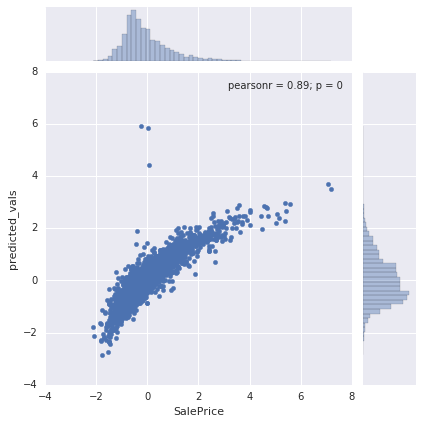

In [21]:
"""
Checking how predicted values from the linear regression model fare with SalePrice.
Looks good.
"""

predictions = cross_val_predict(model, ames[features], ames["SalePrice"], cv=kf)
ames["predicted_vals"] = predictions
sns.jointplot(x='SalePrice', y='predicted_vals', data=ames)



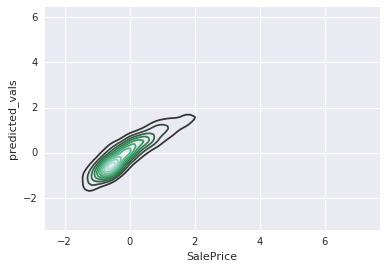

In [22]:
sns.kdeplot(ames.SalePrice, ames.predicted_vals)